In [1]:
# Import packages for data analysis
import pandas as pd
import numpy as np

# Import packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# import packages for statistical modeling
import statsmodels.api as sm

C:\Users\tharindugan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# import sklearn
import sklearn.linear_model as skl_lm

In [3]:
# Set matplotlib style
%matplotlib inline
plt.style.use('seaborn-white')

The linear regression model assumes that the response variable $Y$ is quantitative. But in many situations, the variable is _qualitative_. Predicting a qualitative response for an observation can be refered to as classifying that observation

### Default Data Set
The _Default_ data set contains infomation on credit card holders. We are interested in predicting whether an individual will default on his or her credit card payment. 
Suppose that we are interested in predicting defaults based on his/her annual income, monthly credit card balance.

In [4]:
# Loading the default data set
default=pd.read_excel('./Default.xlsx')
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [5]:
# the data set contains details of 10,000 individuals. 
default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

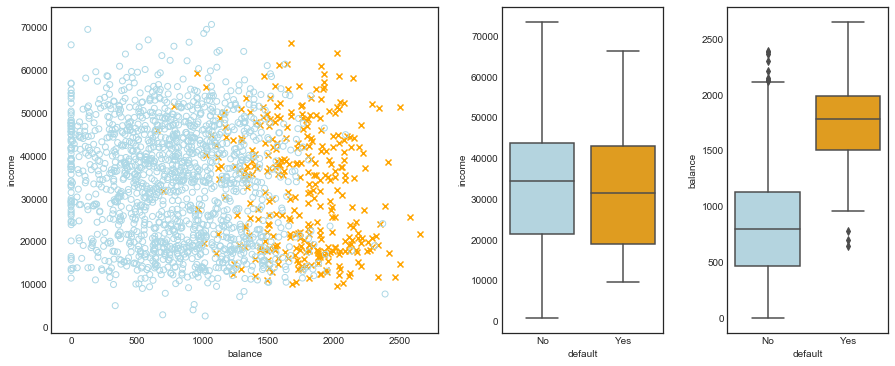

In [6]:
 
fig = plt.figure(figsize=(15, 6))
grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3,)
ax1 = plt.subplot(grid[0,:2])
ax2 = plt.subplot(grid[0,2])
ax3 = plt.subplot(grid[0,3])

# Since the overall default rate is low, sample a fraction of individuals that didn't default.
default_no = default[default['default']=='No'].sample(frac=0.15)
# Select all individuals that did not default
default_yes = default[default['default']=='Yes']

# Plot annual income against monthly credit card balance.
ax1.scatter(default_yes['balance'], default_yes['income'],
                 marker = 'x',color='orange')
ax1.scatter(default_no['balance'], default_no['income'],
                 marker = 'o',facecolor='None', edgecolor='lightblue', linewidth=1)
ax1.set_xlabel('balance')
ax1.set_ylabel('income')


color_pallet =  {'No':'lightblue', 'Yes':'orange'}

# Distribution of balances split by the income
sns.boxplot(x ='default', y ='income', data =default,ax = ax2,palette= color_pallet)

# Distribution of balance for based on whether the individual defaulted
sns.boxplot(x ='default', y ='balance', data =default,ax = ax3, palette= color_pallet)

### Logistic Regression
Logistic regression is a special type of regression where a response falls in to one of two categories. Rather than modeling this response $Y$ directly, logistic regression models the probability that $Y$ belongs to a particular category.

For the _Default_ data, logistic regression models the probability of default. For example, the probability of default given balance can be written as;
    $$Pr(defaults=yes \mid balance)$$
The value of $Pr(default=yes \mid balance)$, can be abbreviated as $p(balance)$, and will be between 0 and 1. Then for any given value of _balance_ a prediction can be made for _default_. For example, one might predict _default=Yes_ for any individual for whom $p(balance) > 0.5$

In logistic regression, we use the logistic funciton,
$$p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
, that gives outputs between 0 and 1 for all values of $X$. To fit the model, we use a method called _maximum likelihood.

In [7]:
default['default_factor']=default['default'].factorize()[0]

In [8]:
X_train = sm.add_constant(default['balance'])
y = default['default_factor']
log_cls = sm.Logit(y,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [9]:
X=np.arange(min(default['balance']),max(default['balance']))
X_test = sm.add_constant(X)
y_pred = log_cls.predict(X_test)

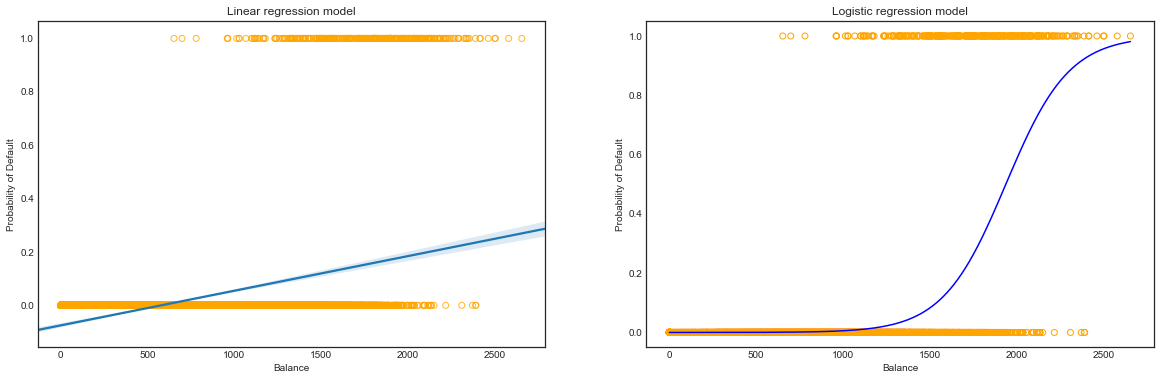

In [10]:
fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

sns.regplot(default['balance'],default['default_factor'], 
            marker='o', scatter_kws= {'edgecolor':'orange','facecolor':'None','lw':1},ax=ax1)

ax1.set_title('Linear regression model')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Probability of Default')

ax2.scatter(default['balance'],default['default_factor'], 
            marker='o',facecolor='None',edgecolor='orange')
ax2.plot(X,y_pred, color ='blue')

ax2.set_title('Logistic regression model')
ax2.set_xlabel('Balance')
ax2.set_ylabel('Probability of Default');

If we were to use linear regression model to predict $p(default)$ for balances we see the following problem with the approach; for balances close to zero we will predict a negative probability of default; if we were to predict for very large balances, we would get a value greater than 1. These predictions are not sensible, since the true probability of default, regardless of credit card balance, must fall between 0 and 1.

When using logistic regression model to predict $p(default)$, for low balances we predict probability of default close to, but never below zero. Likewise, for high balances we predict a default probability close to, but never above, one.

The formula $p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$ can be rearranged as;
$$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$$
Where the quantity $\frac{p(X)}{1-p(X)}$ is called the _odds_, and can take on any value between 0 and $\infty$. values close to 0 indicates very low probability of default and odds close to $\infty$ show very high probability of default. 
By taking the logarithm of both sides of the above equation, we arrive at;
$$log{(\frac{p(X)}{1-p(X)})}=\beta_0+\beta_1X$$

The left-hand side is called log-odds or logit. We can see that the logistic regression model has a logit that is linear in X. One unit increase in of X changes the log odds by $\beta_1$. The amount that $p(X)$ changes due to a one-unit change in $X$ will depend on the current value of $X$.

### Estimating the Regression Coefficients
The coefficients $\beta_0$ and $\beta_1$ in the logistic regression model are unkowns that must be estimated based on the available training data. Just as we used Ordinary Least Square (OLS) for linear regression, for logistic regression we use the _maximum likelihood_ method to fit the model.

In [11]:
log_cls.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


For the coefficient estimates for the logistic model on the _default_ data we see that $\hat\beta_1=0.0055$, that indicates that an increase in balance is associated with an increase in the probability of default, or that one unit increase in balance is associated with an increase in the log odds of default by 0.0055 units.

The z-score associated with $\beta_1$ is equal to $\frac{\hat\beta_1}{SE(\hat\beta_1)}$ and provides evidence against the null hypothesis $H_0:\beta_1=0$, that implies that the probability of default does not depend on predictor variable (balance).

### Making predictions
Once the coefficients have been estimated, it is a simple matter to compute the probability of default for any given credit card balance.

In [12]:
# Predicting the probability of default for a Credit card of $1,000
p_default= log_cls.predict([1,1000])
print ('Probability of Default for a balance of $1,000.00:\n\t',p_default)

# Predicting the probability of default for a Credit card of $1,000
p_default= log_cls.predict([1,2000])
print ('Probability of Default for a balance of $2,000.00:\n\t',p_default)

Probability of Default for a balance of $1,000.00:
	 [0.00575215]
Probability of Default for a balance of $2,000.00:
	 [0.58576937]


As per the model we can predict the probability of default for an individual with a balance of \$1,000 is less than 1\%, In contrast, the predicted probability of default for an individual with a balance of \$2,000 is 58.6%.

We can use qualitative predictors with the logistic regression model using the dummy variable approach.

In [13]:
default['student_dummy'] = default['student'].factorize()[0]

In [14]:
X_train = sm.add_constant(default['student_dummy'])
y = default['default_factor']
log_cls = sm.Logit(y,X_train).fit()
log_cls.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student_dummy,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


The logistic regression model that results from predicting probability of default from student status shows that the coefficient associated with the dummy variable is positive and is statistically significant. This indicates that students tend to have a higher default probability than non-students.

In [15]:
# Predicting the probability of default for a student
p_default= log_cls.predict([1,1])
print ('Probability of Default for a student:\n\t',p_default)

# Predicting the probability of default for a non-student
p_default= log_cls.predict([1,0])
print ('Probability of Default for a non-student:\n\t',p_default)

Probability of Default for a student:
	 [0.04313859]
Probability of Default for a non-student:
	 [0.02919501]


### Multiple Logistic Regression
As seen earlier logistic regression function with a single predictor has a logit that is linear. This can be generalized as;
$$log\bigg ({\frac{p(X)}{1-p(X)}}\bigg )= \beta_0 + \beta_1X_1+ ... +\beta_pX_p$$
where $X = (X_1, X_2,..., X_p)$ are $p$ predictors. We can rewrite the logistic function as;
$$p(X)=\frac{e^{\beta_0 + \beta_1X_1+ ... +\beta_pX_p}}{1+e^{\beta_0 + \beta_1X_1+ ... +\beta_pX_p}}$$
We can then use the maximum likelihood method to estimate $\beta_0, \beta_1,..., \beta_p$.

A logistic regression model that uses _balance, income and student status_ to predict the probability of default can be built as follows.

In [16]:
X_train = sm.add_constant(default[['balance','income','student_dummy']])
y = default['default_factor']
log_cls = sm.Logit(y, X_train).fit()
log_cls.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student_dummy,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


The coefficients for the dummy variable is negative, indicating that students are less likely to default than non-students. However, this contrasts with the single variable logistic regression. 

In [17]:
default_student = default[default['student_dummy']==1]
default_nstudent = default[default['student_dummy']==0]

X_train = sm.add_constant(default_student['balance'])
y = default_student['default_factor']
log_cls_std = sm.Logit(y, X_train).fit()

X = np.arange(500,2500)
X_test = sm.add_constant(X)
p_student = log_cls_std.predict(X_test)

X_train = sm.add_constant(default_nstudent['balance'])
y = default_nstudent['default_factor']
log_cls_nstd = sm.Logit(y, X_train).fit()

p_nstudent = log_cls_nstd.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.095687
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071433
         Iterations 10


Text(0.5,0,'Student Status')

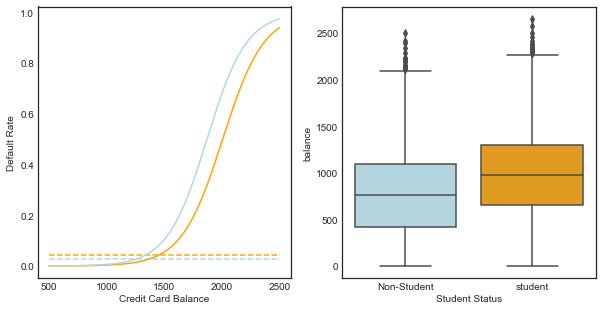

In [18]:
plt.figure(figsize=(10,5))
ax1= plt.subplot(1,2,1)
ax2= plt.subplot(1,2,2)

ax1.plot(X, p_student, color = 'orange')
ax1.plot(X,p_nstudent, color = 'lightblue')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.hlines(default_student['default_factor'].mean(),xmin=500, xmax=2500, color='orange', linestyles='dashed')
ax1.hlines(default_nstudent['default_factor'].mean(),xmin=500, xmax=2500, color='lightblue', linestyles='dashed')

color_pallet =  {0:'lightblue', 1:'orange'}
sns.boxplot(x = 'student_dummy', y= 'balance', data = default, ax = ax2, palette=color_pallet)
ax2.set_xticklabels(['Non-Student','student'])
ax2.set_xlabel('Student Status')

### Linear Discriminant Analysis
Logistic regression involves modeling the conditional distribution of the response $Y$ given the predictor(s) $X$.
An alternative approach is to model the distribution of the predictors $X$ seperately in each of the response classes and then use Bayes' theorem and estimate for $P(Y=k|X=x)$.
We may prefer to use the above method for the following reasons;
* When the classes are well-seperated, the parameter estimates for the logistic regression model are unstable. LDA does not suffer from this problem.
* If $n$ is small and the distribution of the predictors $X$ is normal in each of the classes, the LDA model is more stable than the logistic regression model.
* LDA is popular when there are more than two response classes.

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [20]:
default.head()

,default,student,balance,income,default_factor,student_dummy
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


In [21]:
# Performing LDA on the default data
X = default[['balance', 'income', 'student_dummy']]
y = default['default']

# Creating LDA classifier class object
lda = LinearDiscriminantAnalysis(solver='svd')
# Fit data into the classifier
default_lda = lda.fit(X,y)

# Get results for the training sample
default_predict = default_lda.predict(X)

In [22]:
# Generating confusion matrix comparing the LDA predictions to the true default status 
confusion_df = pd.DataFrame({'True status':y, 'Predicted Status': default_predict})
pd.crosstab(confusion_df['Predicted Status'],confusion_df['True status'],margins=True)

True status,No,Yes,All
Predicted Status,,,
No,9645,254,9899
Yes,22,79,101
All,9667,333,10000


In [23]:
1-precision_score(y_pred=confusion_df['Predicted Status'].values,y_true=confusion_df['True status'].values,average= 'micro')

0.027599999999999958

Elements on the diagonal of the confusion matrix represent individuals whose default status were correctly predicted, whole off-diagonal elements represent individuals that were misclassified.

The LDA made incorrect predictions for 22 individuals who did not default and for 234 individuals who did default. While means the LDA model gives a training error rate of 2.75%.

However, since only 3.33% of the individuals in the training sample defaulted, a simple classifier that always predicts that each individual will not default, regardless of his or her credit balance and student status, will result in a error rate of 3.33%. In other words, the trivial _null_ classifier will achieve an error rate that is only slighly higher than the LDA training set error.

A binary classifier such as this one can make two types of errors, it can incorrectly assign an individual who defaults to the _'no default'_ category, or it can incorrectly assign an individual who does not default to the _'default'_ category. 
Oftan it is useful to determine which of these two types of errors are being made. The confusion matrix shows that LDA predicted a total of 101 individuals would default, of these 79 actually defaulted and 22 did not. Hence only 23 out of 9,667 of the individuals who did not default were incorrectly labled. However, of the 333 individuals who defaulted, 254 (or 75.7%) were missed by LDA. So while the overall error rate is low, the error rate amoung individuals who defaulted is very high.

In [24]:
print (classification_report(y_true= default['default'], y_pred= default_predict ))

             precision    recall  f1-score   support

         No       0.97      1.00      0.99      9667
        Yes       0.78      0.24      0.36       333

avg / total       0.97      0.97      0.97     10000



The Bayes classifier works by assigning an observation to the class for which the posterior probability is greatest. In the two class case, this means assigning an observation to the _default_ class if, $Pr(default=Yes|X=x) > 0.5$.
Thus the Bayes classifier, and by extension LDA, uses a threshold of 50% for the posterior probability of default in order to assign an observation to the _default_ class.
If we are concerned incorrectly predicting the default status for individuals who default, then we can consider lowering this threshold, for an example we can assign an observation to the default class if, 
$$Pr(default=Yes|X=x) >0.2$$

In [25]:
# Predict_proba gives the probability of each observation falling to each of the classes
default_prob = default_lda.predict_proba(X)
# Define observations with a probability > 0.2 of falling in to default as 'default'
confusion_df = pd.DataFrame({'True status':y, 'Predicted Status': default_prob[:,1] > 0.2})
confusion_df['Predicted Status'].replace(to_replace = {False:'No', True:'Yes'},inplace=True)

In [26]:
pd.crosstab(confusion_df['Predicted Status'],confusion_df['True status'],margins=True)

True status,No,Yes,All
Predicted Status,,,
No,9435,140,9575
Yes,232,193,425
All,9667,333,10000


In [27]:
print (classification_report(y_true= confusion_df['True status'], y_pred= confusion_df['Predicted Status'] ))

             precision    recall  f1-score   support

         No       0.99      0.98      0.98      9667
        Yes       0.45      0.58      0.51       333

avg / total       0.97      0.96      0.96     10000



In [28]:
1-precision_score(y_pred=confusion_df['Predicted Status'].values,y_true=confusion_df['True status'].values,average= 'micro')

0.03720000000000001

With the change of the treshold, LDA predicts 425 individuals to default, and of the 333 individuals who defaulted, LDA correctly predict for 193 or 57.9% of the individuals. However, this improvement comes at a cost since 232 individuals who did not default is incorrectly clasified. As a result the overall error rate has increased slightly to 3.73%.

#### Trade Off between Threshold value and Error Rates

In [29]:
overall_error=[]
default_misclass = []
no_default_misclass =[]

thresholds = np.arange(0.0, 0.5, 0.01)

for threshold in thresholds:
    confusion_df = pd.DataFrame({'True status':y, 'Predicted Status': default_prob[:,1] > threshold})
    confusion_df['Predicted Status'].replace(to_replace = {False:'No', True:'Yes'},inplace=True)
    
    overall_error.append(len(confusion_df[confusion_df['Predicted Status']!=confusion_df['True status']])/len(confusion_df))
    default_misclass.append(len(confusion_df[(confusion_df['Predicted Status']=='No') & (confusion_df['True status']=='Yes')])/len(confusion_df[confusion_df['True status']=='Yes']))
    no_default_misclass.append(len(confusion_df[(confusion_df['Predicted Status']=='Yes') & (confusion_df['True status']=='No')])/len(confusion_df[confusion_df['True status']=='No']))    

Text(0,0.5,'Error Rates')

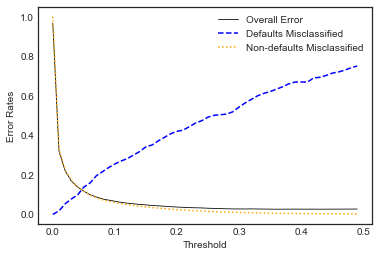

In [31]:
x_axis = np.arange(0.0, 0.5, 0.01)

plt.plot(x_axis, overall_error,color='black', linewidth =0.8, label = 'Overall Error')
plt.plot(x_axis, default_misclass,linestyle='dashed',color='blue', label = 'Defaults Misclassified')
plt.plot(x_axis, no_default_misclass, linestyle='dotted',color='orange', label = 'Non-defaults Misclassified')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Error Rates')

Using a threshold of 0.5 minimizes the overall error rate, (Black solid line), since the Bayes classifier uses a threshold of 0.5 and is known to have the lowest overall error rate. But when a threshold of 0.5 is used, the error rate among the individual who defaulted is quite high. (Blue dashed line). As the threshold is reduced, the error rate amoung individuals who defaulted decrease, but the error rate among individuals who did not default increase.

ROC curve is a graphical plot that simultaneously display the two types of errors for all possible thresholds. The overall performance of a classifier, is given by the *area under the curve* (AUC). An ideal ROC curve will hug the top left corner, so that the AUC is maximized.

In [32]:
true_positives = []
false_positives =[]

thresholds = np.arange(0.0, 1.0, 0.01)

for threshold in thresholds:
    confusion_df = pd.DataFrame({'True status':y, 'Predicted Status': default_prob[:,1] > threshold})
    confusion_df['Predicted Status'].replace(to_replace = {False:'No', True:'Yes'},inplace=True)
    
    true_positives.append(len(confusion_df[(confusion_df['Predicted Status']=='Yes') & (confusion_df['True status']=='Yes')])/len(confusion_df[confusion_df['True status']=='Yes']))
    false_positives.append(len(confusion_df[(confusion_df['Predicted Status']=='Yes') & (confusion_df['True status']=='No')])/len(confusion_df[confusion_df['True status']=='No'])) 

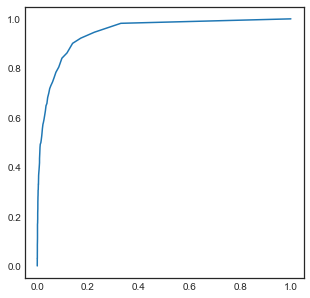

In [33]:
plt.figure(figsize=(5,5))
plt.plot(false_positives,true_positives)

ROC curves are useful for comparing different classifiers,since they take into account all possible thresholds.

### Quadratic Discriminant Analysis
LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution with a class specific mean vector and a covariance matrix that is common to all K classes. _Quadratic discriminant analysis_ (QDA) provides an alternative approach. Unlike LDA, QDA assumes that each class has it's own covariance matrix.

LDA tend to be better that QDA if there are relativly few training observations and so reducing variance is critical. In contrast QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a commmon covariance matrix for the K classes is not possible. 

In [35]:
X = default[['balance', 'income', 'student_dummy']]
y = default['default']

qda = QuadraticDiscriminantAnalysis()

# Train qda model using default training data
default_qda = qda.fit(X,y)

# Get results for the training sample
default_predict = default_qda.predict(X)

In [36]:
confusion_df = pd.DataFrame({'True status':y, 'Predicted Status': default_predict})
pd.crosstab(confusion_df['Predicted Status'],confusion_df['True status'],margins=True)

True status,No,Yes,All
Predicted Status,,,
No,9636,239,9875
Yes,31,94,125
All,9667,333,10000
